In [3]:
#@title TASK 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import itertools
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
RANDOM_STATE = 0

def print_section(title):
    print("\n" + "="*10 + " " + title + " " + "="*10 + "\n")


In [5]:
df = pd.read_csv("heart.csv")
print_section("Dataset Head")
display(df.head())

print_section("Basic Info")
display(df.info())
display(df.describe())



========== Dataset Head ==========



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



========== Basic Info ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



========== Missing Values ==========

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

========== Duplicate Rows ==========

Duplicate count: 723

========== Target Balance ==========

target
1    526
0    499
Name: count, dtype: int64


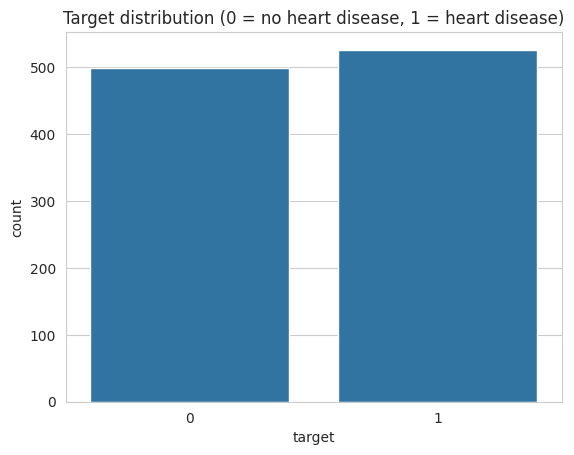

In [6]:

print_section("Missing Values")
print(df.isnull().sum())

print_section("Duplicate Rows")
print("Duplicate count:", df.duplicated().sum())

print_section("Target Balance")
print(df['target'].value_counts())
sns.countplot(x='target', data=df)
plt.title("Target distribution (0 = no heart disease, 1 = heart disease)")
plt.show()


In [7]:
dup = df.duplicated().sum()
if dup > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"Dropped {dup} duplicate rows.")

X = df.drop(columns=['target'])
y = df['target']

categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)

# Impute numeric with median
num_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

# Impute categorical with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

print("\nMissing after imputation:")
print(X.isnull().sum())


Dropped 723 duplicate rows.
Numeric cols: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical cols: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Missing after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [8]:
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

display(X.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2


In [9]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=RANDOM_STATE, stratify=y_train_full)

X_scaled_train_full, X_scaled_test, y_s_train_full, y_s_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

X_scaled_train, X_scaled_val, y_s_train, y_s_val = train_test_split(X_scaled_train_full, y_s_train_full, test_size=0.3, random_state=RANDOM_STATE, stratify=y_s_train_full)

print("Shapes:")
print("X_train:", X_train.shape, "X_val:", X_val.shape, "X_test:", X_test.shape)


Shapes:
X_train: (168, 13) X_val: (73, 13) X_test: (61, 13)


In [11]:
models = {
    'RandomForest': RandomForestClassifier(random_state=RANDOM_STATE),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_tr_pred)
    test_acc = accuracy_score(y_test, y_te_pred)
    results.append((name, train_acc, test_acc))
    print_section(f"{name} Results")
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_te_pred))
    print()

results_df = pd.DataFrame(results, columns=["Model", "Train Acc", "Test Acc"])
display(results_df)



========== RandomForest Results ==========

Train Accuracy: 1.0
Test Accuracy: 0.9180327868852459
Confusion Matrix:
 [[25  3]
 [ 2 31]]


========== XGBoost Results ==========

Train Accuracy: 1.0
Test Accuracy: 0.8032786885245902
Confusion Matrix:
 [[24  4]
 [ 8 25]]


========== AdaBoost Results ==========

Train Accuracy: 0.9166666666666666
Test Accuracy: 0.819672131147541
Confusion Matrix:
 [[25  3]
 [ 8 25]]



,Model,Train Acc,Test Acc
0,RandomForest,1.000000,0.918033
1,XGBoost,1.000000,0.803279
2,AdaBoost,0.916667,0.819672


In [12]:
features_sub = ['restecg', 'oldpeak']
X2 = X[features_sub].copy()

scaler2 = StandardScaler()
X2_scaled = X2.copy()
X2_scaled['oldpeak'] = scaler2.fit_transform(X2[['oldpeak']])

X2_train_full, X2_test, y2_train_full, y2_test = train_test_split(X2, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_full, y2_train_full, test_size=0.3, random_state=RANDOM_STATE, stratify=y2_train_full)

X2s_train_full, X2s_test, ys2_train_full, ys2_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
X2s_train, X2s_val, ys2_train, ys2_val = train_test_split(X2s_train_full, ys2_train_full, test_size=0.3, random_state=RANDOM_STATE, stratify=ys2_train_full)

print("Subset shapes:", X2_train.shape, X2_val.shape, X2_test.shape)


Subset shapes: (168, 2) (73, 2) (61, 2)


In [13]:
clf_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_knn = KNeighborsClassifier(n_neighbors=5)   # KNN needs scaled features
clf_rf = RandomForestClassifier(random_state=RANDOM_STATE)
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)

X_vtrain = X2s_train
X_vval = X2s_val
X_vtest = X2s_test

voting_hard = VotingClassifier(estimators=[
    ('dt', clf_dt), ('knn', clf_knn), ('rf', clf_rf), ('xgb', clf_xgb)
], voting='hard')

voting_soft = VotingClassifier(estimators=[
    ('dt', clf_dt), ('knn', clf_knn), ('rf', clf_rf), ('xgb', clf_xgb)
], voting='soft')

voting_hard.fit(X_vtrain, ys2_train)
voting_soft.fit(X_vtrain, ys2_train)

print("Voting Hard - Train acc:", accuracy_score(ys2_train, voting_hard.predict(X_vtrain)),
      "Val acc:", accuracy_score(ys2_val, voting_hard.predict(X_vval)),
      "Test acc:", accuracy_score(ys2_test, voting_hard.predict(X_vtest)))

print("Voting Soft - Train acc:", accuracy_score(ys2_train, voting_soft.predict(X_vtrain)),
      "Val acc:", accuracy_score(ys2_val, voting_soft.predict(X_vval)),
      "Test acc:", accuracy_score(ys2_test, voting_soft.predict(X_vtest)))


Voting Hard - Train acc: 0.7738095238095238 Val acc: 0.6438356164383562 Test acc: 0.639344262295082
Voting Soft - Train acc: 0.7738095238095238 Val acc: 0.6438356164383562 Test acc: 0.639344262295082


In [14]:
estimators = [('dt', DecisionTreeClassifier(random_state=RANDOM_STATE)),
              ('knn', KNeighborsClassifier(n_neighbors=5)),
              ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
              ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))]
best = {'weights': None, 'val_acc': -1, 'voting':'soft'}
weights_range = range(1,5)

for weights in itertools.product(weights_range, repeat=4):
    vc = VotingClassifier(estimators=estimators, voting='soft', weights=list(weights))
    try:
        vc.fit(X_vtrain, ys2_train)
        val_acc = accuracy_score(ys2_val, vc.predict(X_vval))
        if val_acc > best['val_acc']:
            best.update({'weights': weights, 'val_acc': val_acc})
    except Exception:
        continue

print_section("Best weight search (soft voting)")
print("Best weights:", best['weights'], "Validation Accuracy:", best['val_acc'])

vc_best = VotingClassifier(estimators=estimators, voting='soft', weights=list(best['weights']))
vc_best.fit(X_vtrain, ys2_train)
print("Test accuracy of best weighted soft-voting:", accuracy_score(ys2_test, vc_best.predict(X_vtest)))



========== Best weight search (soft voting) ==========

Best weights: (1, 1, 2, 1) Validation Accuracy: 0.6575342465753424
Test accuracy of best weighted soft-voting: 0.639344262295082


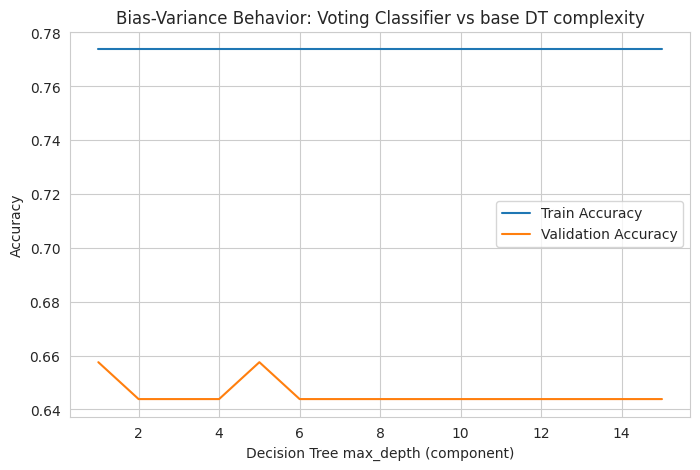

In [15]:
depths = list(range(1, 16))
train_accs = []
val_accs = []

for d in depths:
    ests = [
        ('dt', DecisionTreeClassifier(max_depth=d, random_state=RANDOM_STATE)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))
    ]
    vc = VotingClassifier(estimators=ests, voting='soft')
    vc.fit(X_vtrain, ys2_train)
    train_accs.append(accuracy_score(ys2_train, vc.predict(X_vtrain)))
    val_accs.append(accuracy_score(ys2_val, vc.predict(X_vval)))

plt.figure(figsize=(8,5))
plt.plot(depths, train_accs, label='Train Accuracy')
plt.plot(depths, val_accs, label='Validation Accuracy')
plt.xlabel("Decision Tree max_depth (component)")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Behavior: Voting Classifier vs base DT complexity")
plt.legend()
plt.show()



========== Individual Models - Task 3 (restecg & chol) ==========

RandomForest - Train acc: 0.9226190476190477 Test acc: 0.4918032786885246
AdaBoost      - Train acc: 0.6369047619047619 Test acc: 0.5409836065573771
Voting (RF + Ada) - Test acc: 0.5409836065573771


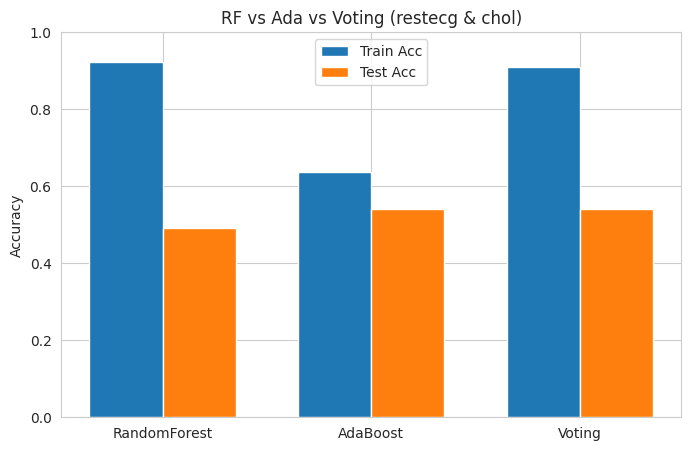

In [16]:
features_sub2 = ['restecg','chol']
X3 = X[features_sub2].copy()

X3_scaled = X3.copy()
X3_scaled['chol'] = StandardScaler().fit_transform(X3[['chol']])

X3_train_full, X3_test, y3_train_full, y3_test = train_test_split(X3_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train_full, y3_train_full, test_size=0.3, random_state=RANDOM_STATE, stratify=y3_train_full)

rf3 = RandomForestClassifier(random_state=RANDOM_STATE)
ada3 = AdaBoostClassifier(random_state=RANDOM_STATE)

rf3.fit(X3_train, y3_train)
ada3.fit(X3_train, y3_train)

print_section("Individual Models - Task 3 (restecg & chol)")
print("RandomForest - Train acc:", accuracy_score(y3_train, rf3.predict(X3_train)), "Test acc:", accuracy_score(y3_test, rf3.predict(X3_test)))
print("AdaBoost      - Train acc:", accuracy_score(y3_train, ada3.predict(X3_train)), "Test acc:", accuracy_score(y3_test, ada3.predict(X3_test)))

voting_pair = VotingClassifier(estimators=[('rf', rf3), ('ada', ada3)], voting='soft')
voting_pair.fit(X3_train, y3_train)
print("Voting (RF + Ada) - Test acc:", accuracy_score(y3_test, voting_pair.predict(X3_test)))

models_plot = [('RandomForest', rf3), ('AdaBoost', ada3), ('Voting', voting_pair)]
train_accs = [accuracy_score(y3_train, m.predict(X3_train)) for _, m in models_plot]
test_accs = [accuracy_score(y3_test, m.predict(X3_test)) for _, m in models_plot]

x = np.arange(len(models_plot))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_accs, width, label='Train Acc')
plt.bar(x + width/2, test_accs, width, label='Test Acc')
plt.xticks(x, [name for name,_ in models_plot])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("RF vs Ada vs Voting (restecg & chol)")
plt.legend()
plt.show()
